In [1]:

from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister , transpile
from qiskit . visualization import *
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

In [2]:
def controlled_Z ( circuit , control , target ):
#Implement a Z gate with a single control
    circuit.h(target)
    circuit.cx(control, target)
    circuit.h(target)

A new cell containing the phase oracle for targeting the state |11⟩ in phase_oracle() function

In [3]:
def phase_oracle ( circuit , registers ):
# Call function that implements CZ gate
    controlled_Z( circuit , registers[0] , registers[1])

In [4]:
def grover_diffusion ( circuit , registers ) :
    # Apply Hadamard and X gates on all qubits
    circuit.h(registers)
    circuit.x(registers)
    
    # Create a barrier that isolates different sections of the circuit
    circuit.barrier()
    
    # Apply CZ gate with target as qubit 1
    controlled_Z( circuit , registers[0] , registers[1])
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)

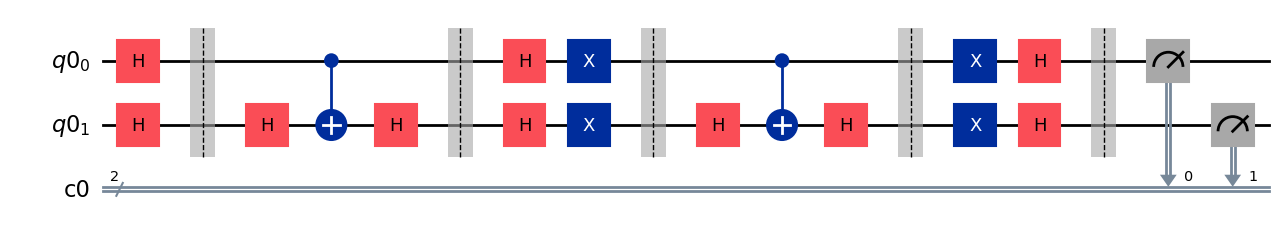

In [5]:
# Define circuit constants
Qubits = 2
tests = 1

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit.h(qr)

# Run phase oracle and diffusion operators .
# Can be run multiple times depending on the variable , tests .
for test in range (0 , tests ):
    groverCircuit.barrier()
    phase_oracle(groverCircuit,qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit,qr)
# Measure quantum registers
groverCircuit.barrier()
groverCircuit.measure(qr , cr )

# Draw Circuit
fig = groverCircuit.draw(output="mpl")
display(fig)
plt.close(fig)  # prevent figures from stacking up

Main - Transpile and run the circuit on the aer simulator and plot the distribution.

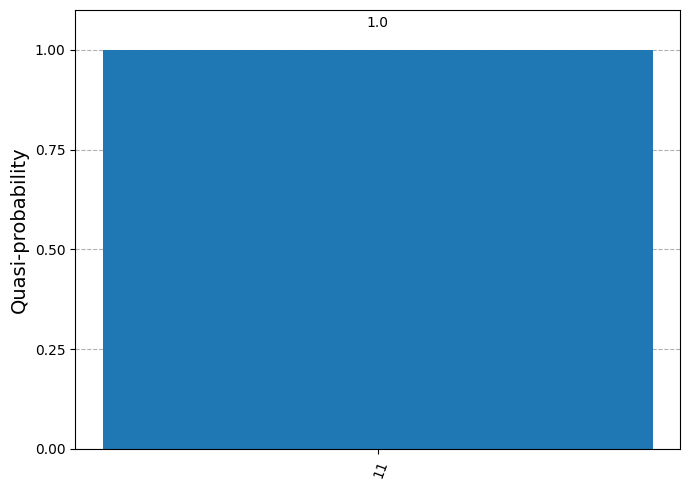

In [6]:
# Define backend that will simulate quantum circuit
aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)

Three oracles that target the remaining states |00⟩, |10⟩, |01⟩. 

Target 0:


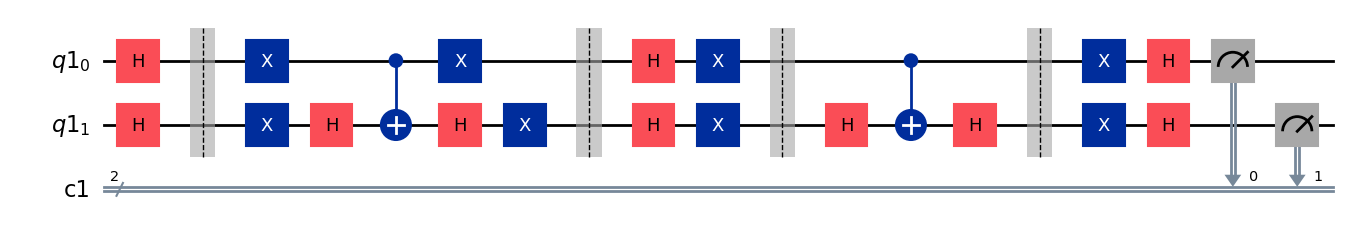

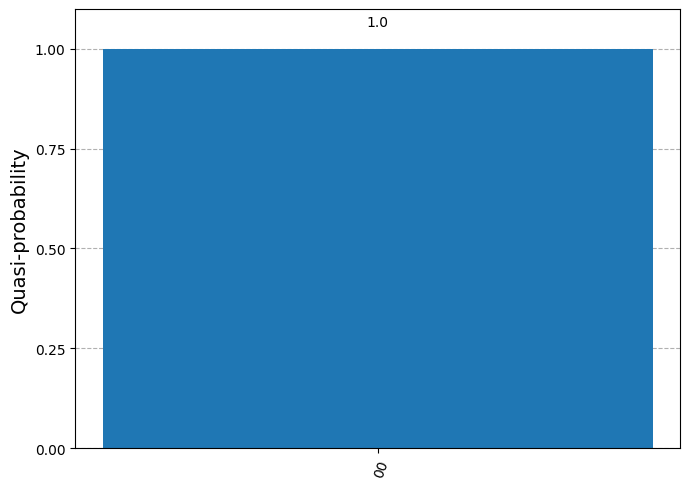

Target 1:


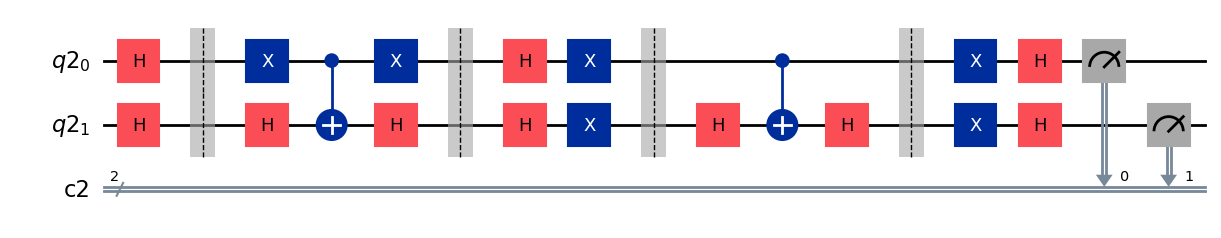

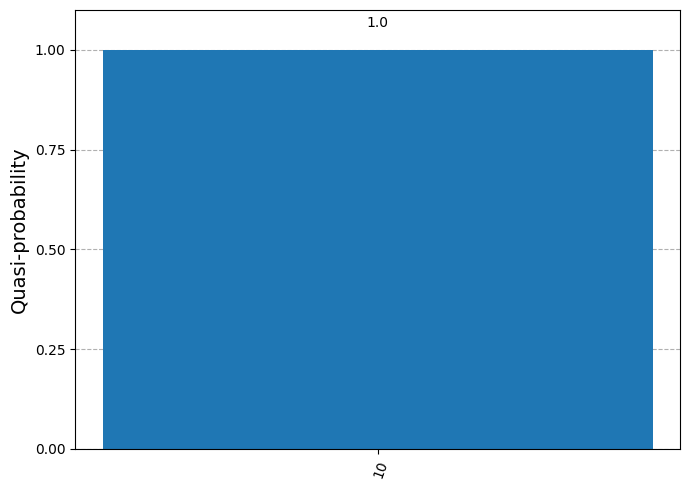

Target 2:


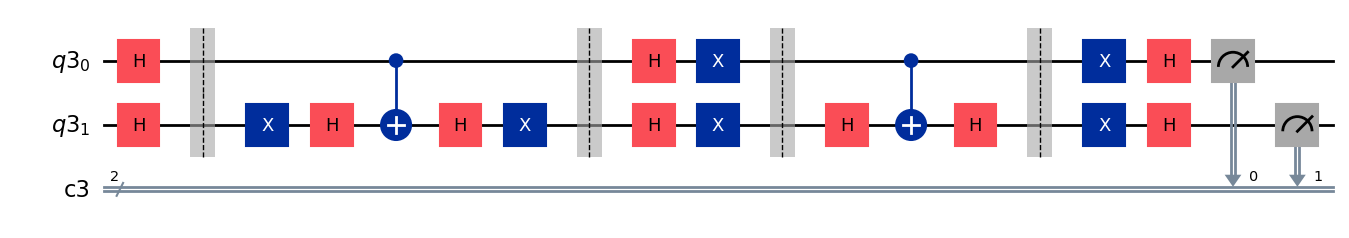

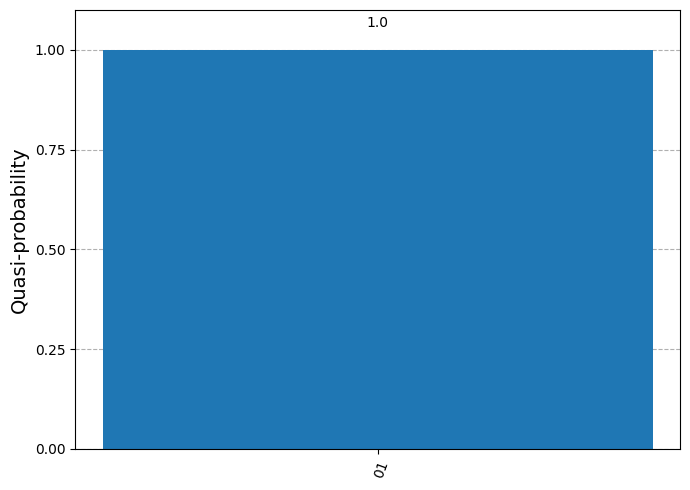

In [7]:
# Define circuit constants
Qubits = 2
tests = 3
for test in range(tests):
    qr1 = QuantumRegister(Qubits)
    cr1 = ClassicalRegister(Qubits)
    
    groverCircuit1 = QuantumCircuit(qr1, cr1)
    groverCircuit1.h(qr1)

    groverCircuit1.barrier()
    print(f"Target {test}:")
    if test == 0:  # |00⟩
        groverCircuit1.x(qr1[0]); groverCircuit1.x(qr1[1])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[0]); groverCircuit1.x(qr1[1])
    elif test == 1:  # |01⟩
        groverCircuit1.x(qr1[0])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[0])
    else:  # |10⟩
        groverCircuit1.x(qr1[1])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[1])

    groverCircuit1.barrier()
    grover_diffusion(groverCircuit1, qr1)
    groverCircuit1.measure(qr1, cr1)

    # Explicit display
    fig = groverCircuit1.draw(output="mpl")
    display(fig)
    plt.close(fig)  # prevent figures from stacking up


    aer_sim1 = AerSimulator()

    grovers_aer1 = transpile(groverCircuit1,backend = aer_sim1 )

    # Run the transpiled circuit on the simulator
    result = aer_sim1.run(grovers_aer1).result()
    counts = result.get_counts()

    # Plot the distribution
    hist = plot_distribution(counts)
    display(hist)
    plt.close(hist)

3-qubit Grover search

In [8]:
def ccz(circuit , control1 , control2, target ):
#Implement a Z gate with a single control
    circuit.h(target)
    circuit.ccx(control1,control2,target)
    circuit.h(target)

In [9]:
def phase_oracle_3_qubit (circuit , registers ):
# Call function that implements CZ gate
    ccz( circuit , registers[0] , registers[1], registers[2])

In [10]:
def grover_diffusion_3_qubit( circuit , registers ) :
    # Apply Hadamard and X gates on all qubits
    circuit.h(registers)
    circuit.x(registers)
    
    # Create a barrier that isolates different sections of the circuit
    circuit.barrier()
    
    # Apply CZ gate with target as qubit 1
    ccz( circuit , registers[0] , registers[1], registers[2])
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)

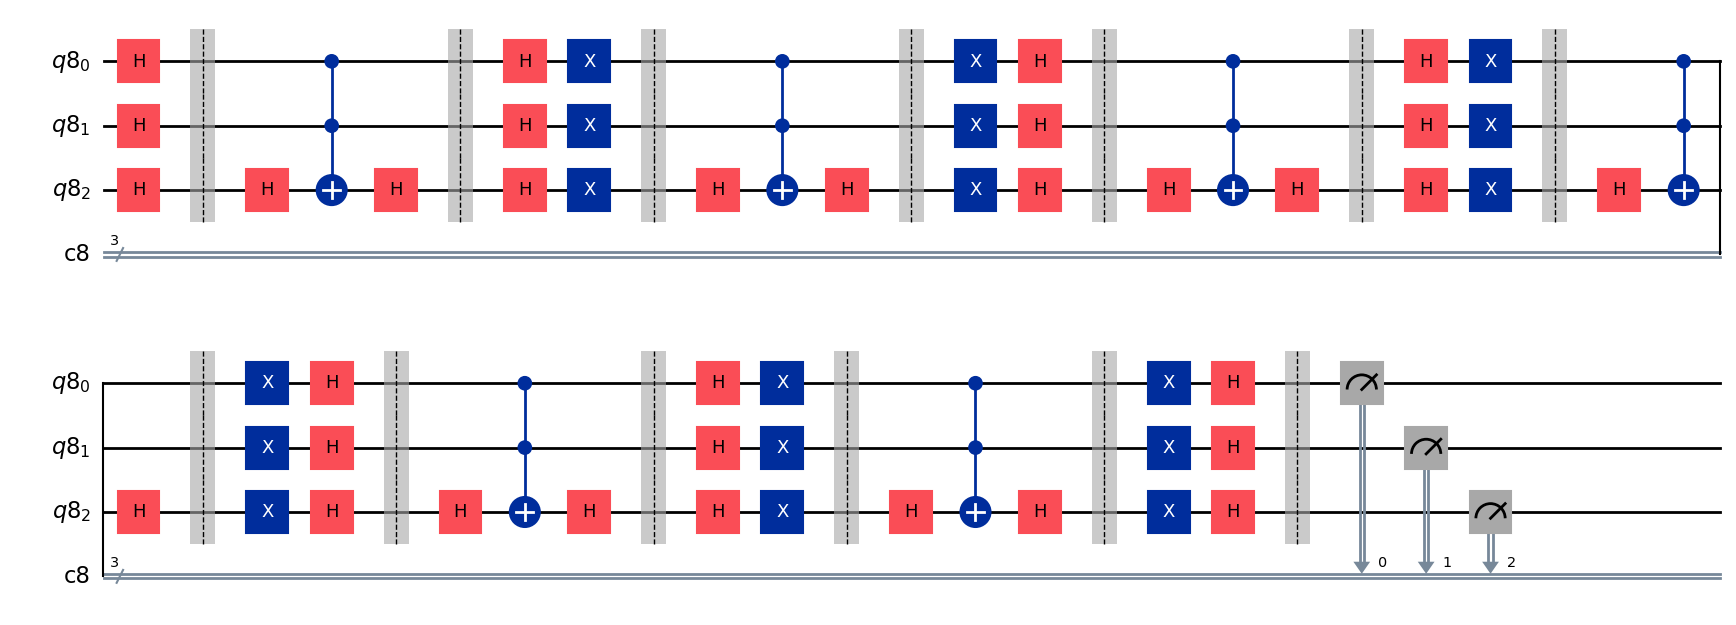

In [ ]:
# Define circuit constants
Qubits = 3
tests = 2

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit_3Qubit = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit_3Qubit.h(qr)

# Run phase oracle and diffusion operators .
# Can be run multiple times depending on the variable , tests .
for test in range (0 , tests ):
    groverCircuit_3Qubit.barrier()
    phase_oracle_3_qubit(groverCircuit_3Qubit,qr)
    groverCircuit_3Qubit.barrier()
    grover_diffusion_3_qubit(groverCircuit_3Qubit,qr)
# Measure quantum registers
groverCircuit_3Qubit.barrier()
groverCircuit_3Qubit.measure(qr , cr )

# Draw Circuit
fig = groverCircuit_3Qubit.draw(output="mpl")
display(fig)
plt.close(fig)  # prevent figures from stacking up

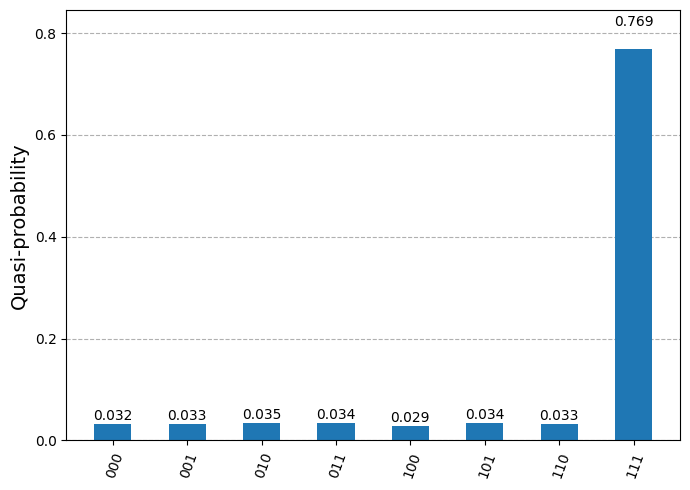

In [12]:
# Define backend that will simulate quantum circuit
aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit_3Qubit,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)

3 Qubit oracle target: |001⟩

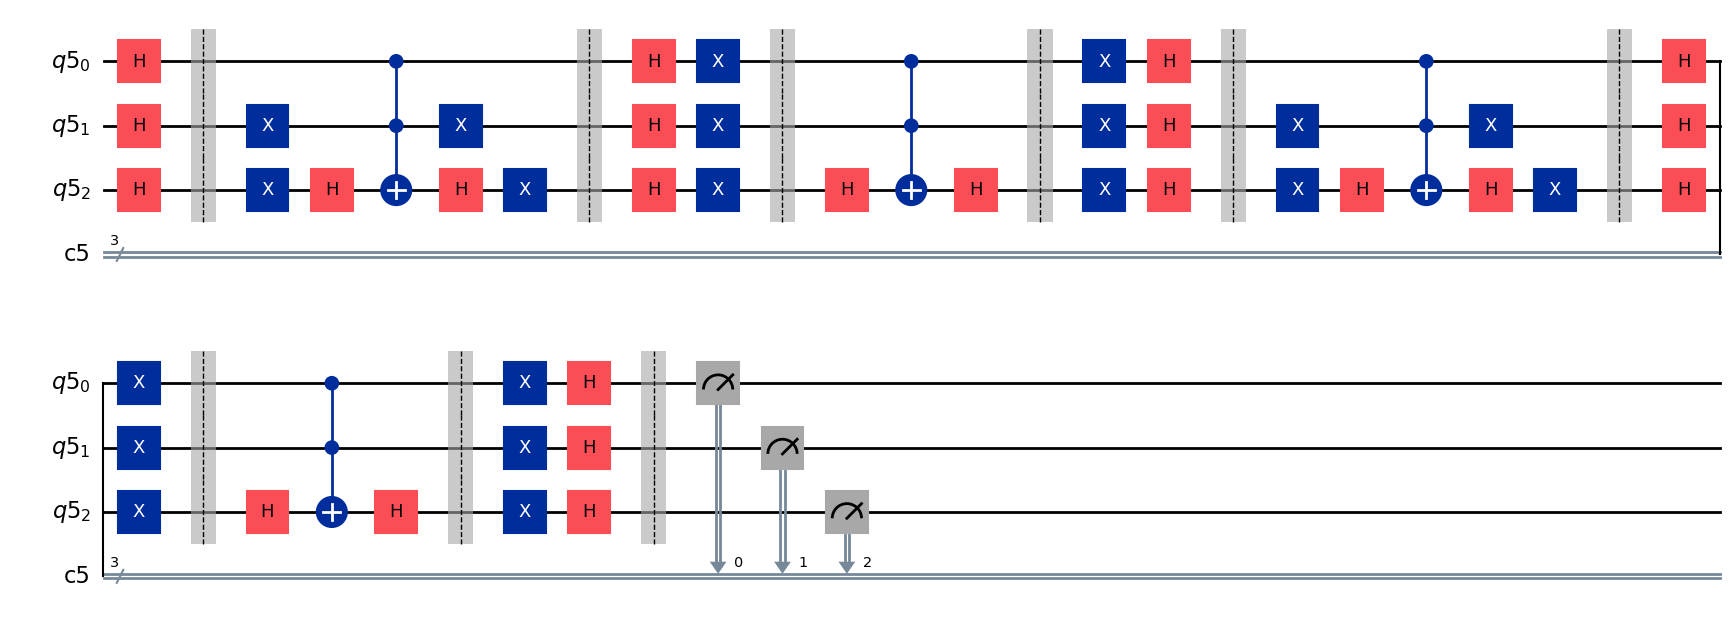

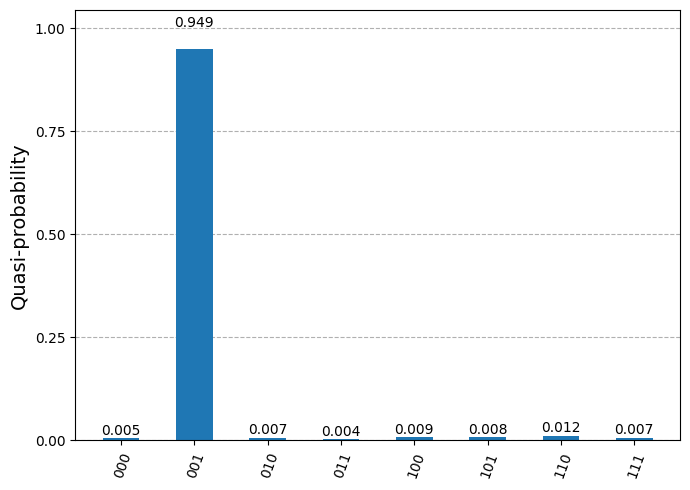

In [13]:
Qubits = 3
tests = 2

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit_3Qubit_001 = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit_3Qubit_001.h(qr)
for test in range (0 , tests ):
    groverCircuit_3Qubit_001.barrier()
    # modifcation to change oracle target
    groverCircuit_3Qubit_001.x(qr[2])
    groverCircuit_3Qubit_001.x(qr[1])

    phase_oracle_3_qubit(groverCircuit_3Qubit_001,qr)
    # modifcation to reflect oracle target back to original state
    groverCircuit_3Qubit_001.x(qr[2])
    groverCircuit_3Qubit_001.x(qr[1])

    groverCircuit_3Qubit_001.barrier()
    grover_diffusion_3_qubit(groverCircuit_3Qubit_001,qr)

groverCircuit_3Qubit_001.barrier()
groverCircuit_3Qubit_001.measure(qr , cr )

# Draw Circuit
fig = groverCircuit_3Qubit_001.draw(output="mpl")
display(fig)
plt.close(fig)  # p

aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit_3Qubit_001,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)

3 Qubit oracle target: |000⟩

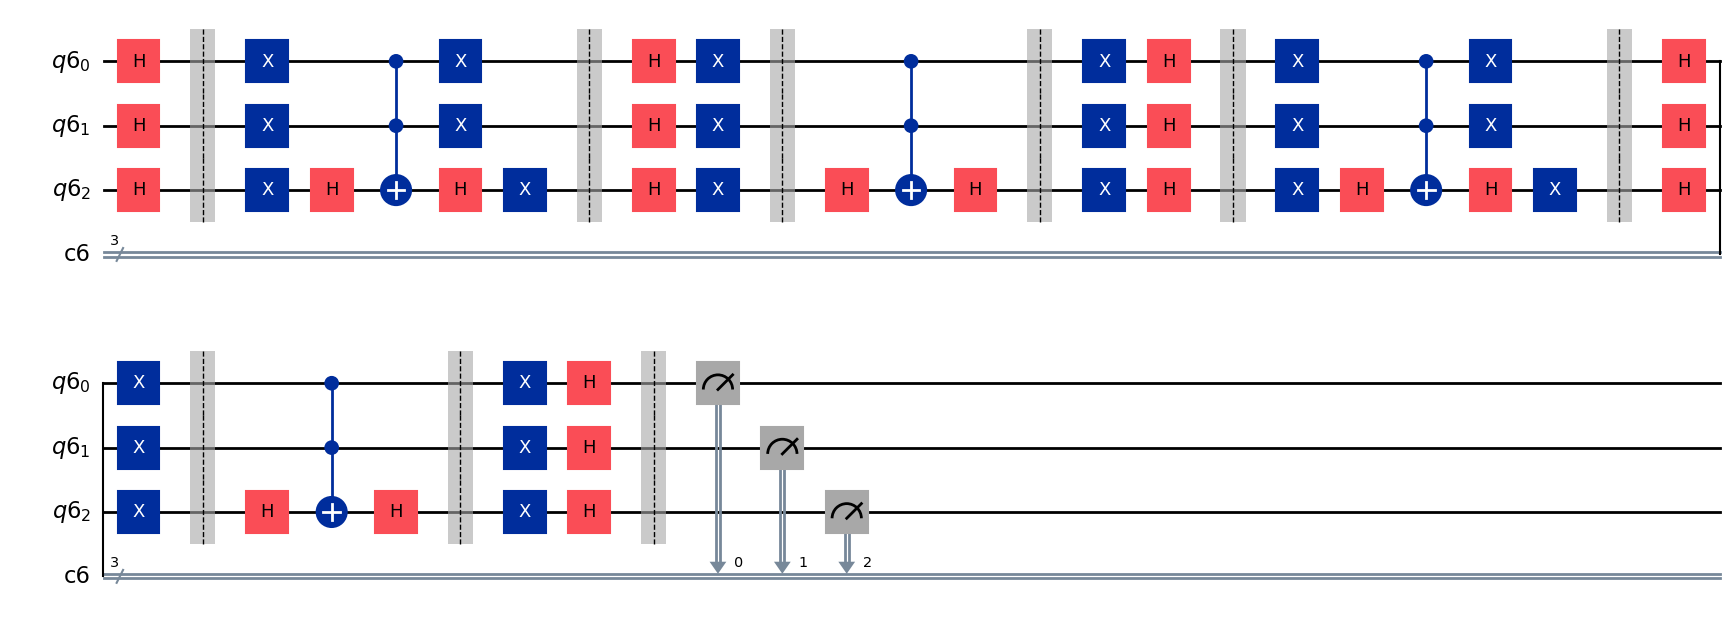

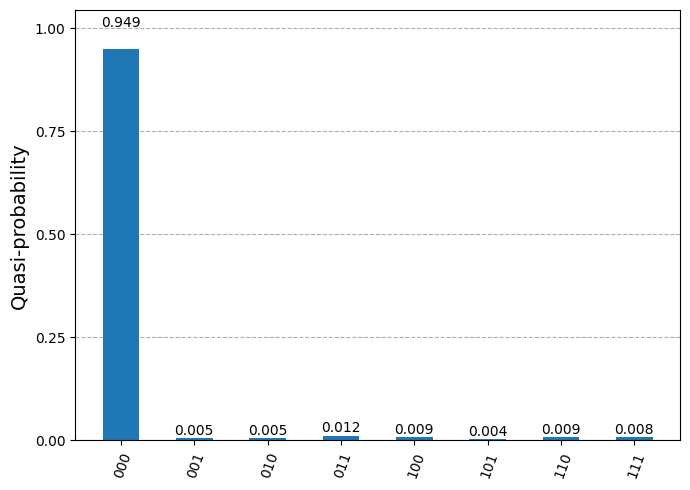

In [14]:
Qubits = 3
tests = 2

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit_3Qubit_111 = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit_3Qubit_111.h(qr)

for test in range (0 , tests ):

    groverCircuit_3Qubit_111.barrier()
    # modifcation to change oracle target
    groverCircuit_3Qubit_111.x(qr[2])
    groverCircuit_3Qubit_111.x(qr[1])
    groverCircuit_3Qubit_111.x(qr[0])

    phase_oracle_3_qubit(groverCircuit_3Qubit_111,qr)
    # modifcation to reflect oracle target back to original state
    groverCircuit_3Qubit_111.x(qr[0])
    groverCircuit_3Qubit_111.x(qr[1])
    groverCircuit_3Qubit_111.x(qr[2])

    groverCircuit_3Qubit_111.barrier()
    grover_diffusion_3_qubit(groverCircuit_3Qubit_111,qr)

groverCircuit_3Qubit_111.barrier()
groverCircuit_3Qubit_111.measure(qr , cr )

# Draw Circuit
fig = groverCircuit_3Qubit_111.draw(output="mpl")
display(fig)
plt.close(fig)  # p

aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit_3Qubit_111,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)

3 Qubit oracle target: |110⟩

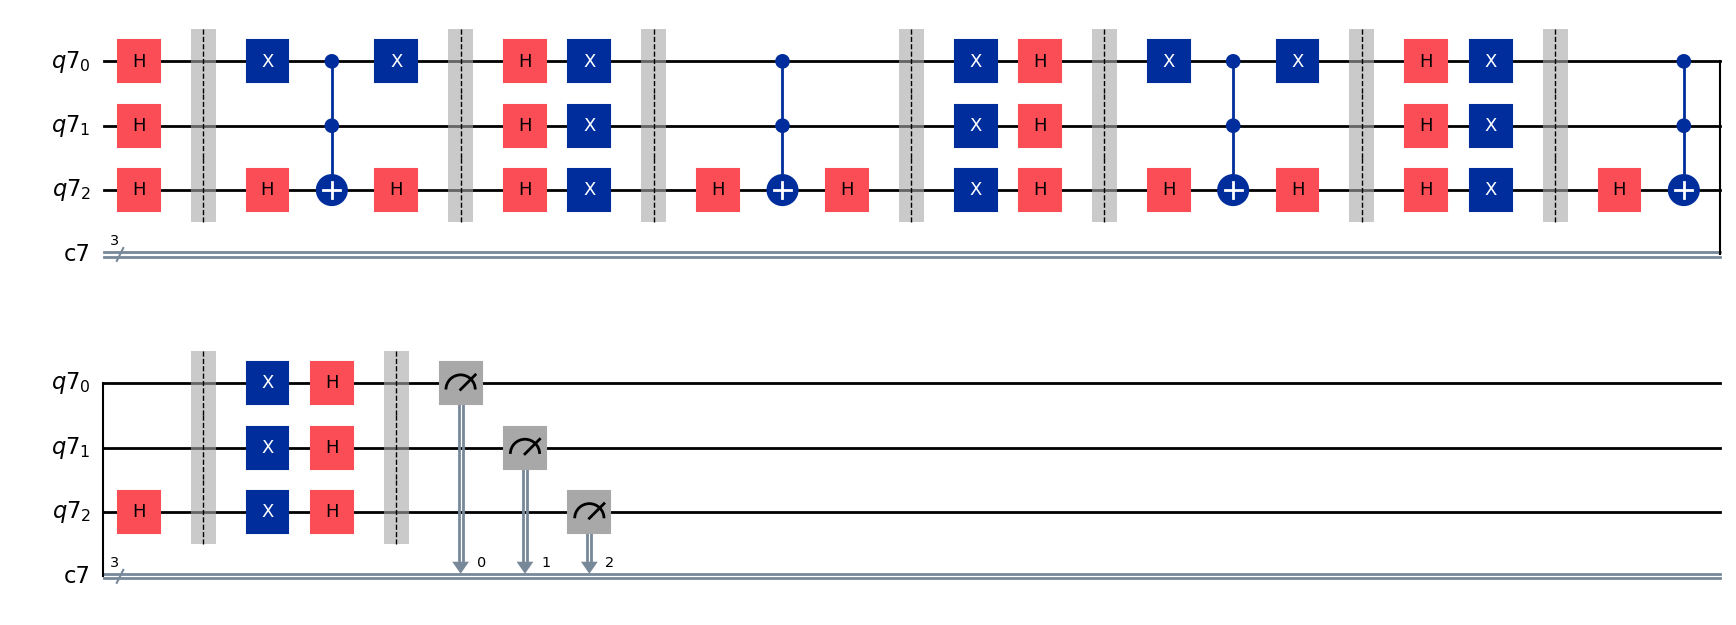

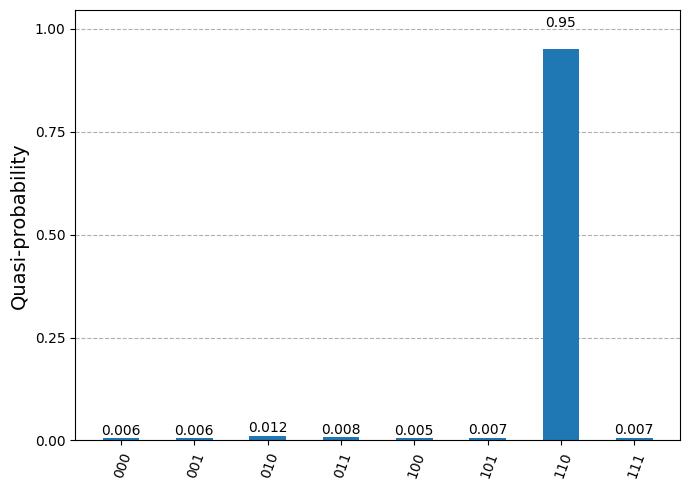

In [15]:
Qubits = 3
tests = 2

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit_3Qubit_110 = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit_3Qubit_110.h(qr)

for test in range (0 , tests ):

    groverCircuit_3Qubit_110.barrier()
    # modifcation to change oracle target

    groverCircuit_3Qubit_110.x(qr[0])

    phase_oracle_3_qubit(groverCircuit_3Qubit_110,qr)
    # modifcation to reflect oracle target back to original state
    groverCircuit_3Qubit_110.x(qr[0])


    groverCircuit_3Qubit_110.barrier()
    grover_diffusion_3_qubit(groverCircuit_3Qubit_110,qr)

groverCircuit_3Qubit_110.barrier()
groverCircuit_3Qubit_110.measure(qr , cr )

# Draw Circuit
fig = groverCircuit_3Qubit_110.draw(output="mpl")
display(fig)
plt.close(fig)  # p

aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit_3Qubit_110,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)